# Tree House Lung Cancer Binary Classifier exploration
- Andrew E. Davidson
- [aedavids@ucsc.edu](mailto:aedavids@edu?subject=lungCancerClassificationExploration.ipynb)
- lab attribution



## Overview
Explore TCGA cancer samples. Surprisingly all example appear to be from people that are sick. Examples labeled as as normal does not imply the person was healthy.  Notice figure 1 does not have a "health class". It might be very useful to create a data set that contains both health and sick people

<span style="color=red"> AEDWIP double check meaning of health. does it mean benign cancer? never found a data dictionary </span>

Rows with NA where dropped by data clean up pipe line

references:
- [https://ucsc-xena.gitbook.io/project/public-data-we-host/tcga](https://ucsc-xena.gitbook.io/project/public-data-we-host/tcga)
- [https://xenabrowser.net/datapages/?hub=https://toil.xenahubs.net:443](https://xenabrowser.net/datapages/?hub=https://toil.xenahubs.net:443)
- [https://github.com/rcurrie/tumornormal/blob/master/ingest.ipynb](https://github.com/rcurrie/tumornormal/blob/master/ingest.ipynb)

In [17]:
import matplotlib.pyplot as plt
import matplotlib.patches as mplpatches

from matplotlibUtilities.histogram import Histogram as muHistogram
import matplotlibUtilities.utilities as mu
import numpy as np
import pandas as pd

# fix random seed for reproducibility
theMeaningOfLife = 42
np.random.seed(theMeaningOfLife)

## Load Data

In [2]:
%%time

rootDir = ".."
dataFile = "{}/data/tcga_target_gtex.h5".format(rootDir)

# https://en.wikipedia.org/wiki/Hierarchical_Data_Format
store = pd.HDFStore(dataFile, mode="r")
print("store.info():{}".format(store.info()))
print("store.keys():{}".format(store.keys()))

store.info():<class 'pandas.io.pytables.HDFStore'>
File path: ../data/tcga_target_gtex.h5
/expression            frame        (shape->[19126,58581])
/labels                frame        (shape->[1,7])        
store.keys():['/expression', '/labels']
CPU times: user 77.5 ms, sys: 34 ms, total: 111 ms
Wall time: 208 ms


In [3]:
%%time
# Load data set
X = pd.read_hdf(dataFile, "expression") # RNA Sequence data
Y = pd.read_hdf(dataFile, "labels")

CPU times: user 13.6 s, sys: 6.39 s, total: 20 s
Wall time: 20.1 s


## Explore RNA Sequence data
- ref [https://xenabrowser.net/datapages/?hub=https://toil.xenahubs.net:443](https://xenabrowser.net/datapages/?hub=https://toil.xenahubs.net:443)
- RNA Sequence values are log. what is base? 
- Was anything else done to make the data sets comparable?

In [4]:
X.head().iloc[:, 1:5]

,5_8S_rRNA,7SK,A1BG,A1BG-AS1
GTEX-1117F-0226-SM-5GZZ7,-9.965816,-9.965881,4.4595,0.9343
GTEX-1117F-0426-SM-5EGHI,-9.965816,-9.965881,1.1512,-1.2828
GTEX-1117F-0526-SM-5EGHJ,-9.965816,-9.965881,5.2411,0.8488
GTEX-1117F-0626-SM-5N9CS,-9.965816,-9.965881,5.4758,2.6325
GTEX-1117F-0726-SM-5GIEN,-9.965816,-0.833902,4.5534,1.3051


In [5]:
print("X.shape:{}".format(X.shape))
first5GenesDf = X.iloc[:, 1:5]
print("first 5 genes")
first5GenesDf.describe()

X.shape:(19126, 58581)
first 5 genes


,5_8S_rRNA,7SK,A1BG,A1BG-AS1
count,19126.000000,19126.000000,19126.000000,19126.000000
mean,-9.962880,-7.613990,3.624465,1.158016
std,0.182181,3.946099,1.991185,1.561282
min,-9.965816,-9.965881,-9.965800,-9.965800
25%,-9.965816,-9.965881,2.441200,0.215400
50%,-9.965816,-9.965881,3.645100,1.313800
75%,-9.965816,-2.826196,4.725150,2.321475
max,2.702900,6.704600,13.798300,5.608800


## Explore meta data

In [6]:
Y.head() #.iloc[:, 1:5]

,category,disease,primary_site,sample_type,gender,study,tumor_normal
id,,,,,,,
GTEX-1117F-0226-SM-5GZZ7,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose Tissue,Normal Tissue,Female,GTEX,Normal
GTEX-1117F-0426-SM-5EGHI,Muscle - Skeletal,Muscle - Skeletal,Muscle,Normal Tissue,Female,GTEX,Normal
GTEX-1117F-0526-SM-5EGHJ,Artery - Tibial,Artery - Tibial,Blood Vessel,Normal Tissue,Female,GTEX,Normal
GTEX-1117F-0626-SM-5N9CS,Artery - Coronary,Artery - Coronary,Blood Vessel,Normal Tissue,Female,GTEX,Normal
GTEX-1117F-0726-SM-5GIEN,Heart - Atrial Appendage,Heart - Atrial Appendage,Heart,Normal Tissue,Female,GTEX,Normal


In [7]:
print("Y.shape:{}".format(Y.shape))
Y.describe()

Y.shape:(19126, 7)


,category,disease,primary_site,sample_type,gender,study,tumor_normal
count,19126,19126,19126,19126,19126,19126,19126
unique,93,93,46,16,3,3,2
top,Breast Invasive Carcinoma,Breast Invasive Carcinoma,Brain,Primary Tumor,Male,TCGA,Tumor
freq,1212,1212,1846,9185,10453,10534,10530


In [8]:
Y.columns

Index(['category', 'disease', 'primary_site', 'sample_type', 'gender', 'study',
       'tumor_normal'],
      dtype='object')

### Explore the distrubtion of 'categories'
what is the difference between category, disease, primary_site	meta data? Values seem like they are the same? Is there a bug in the data clean up pipeline?

Text(0.5, 1.0, 'Fig. 1 Category counts')

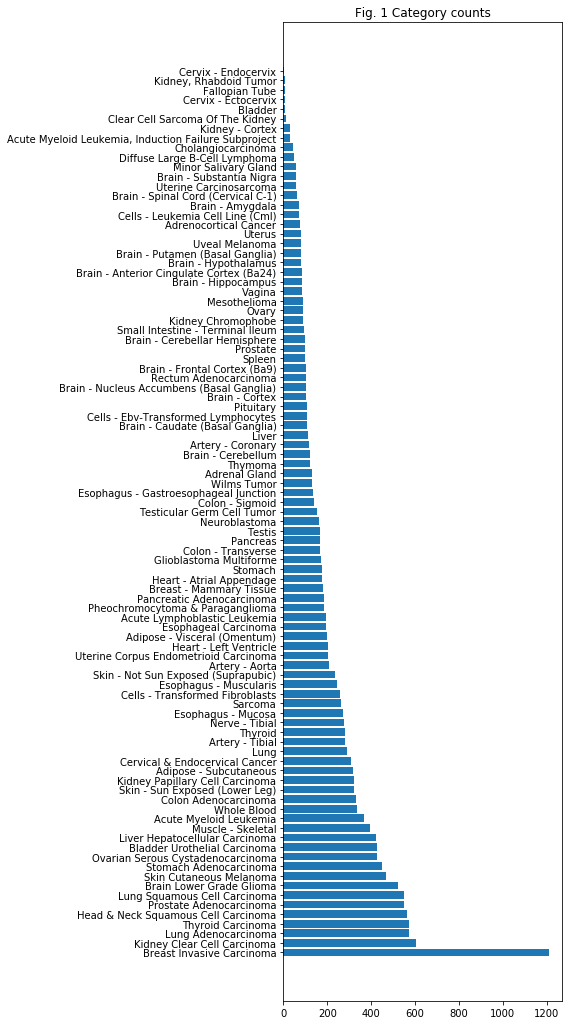

In [9]:
def plotCategoryCounts(df, colNameStr):
    '''
    TODO: make this more generic
    argument 
        df: a pandas data frame 
        colNameStr: 
        
    returns:
        (fix, axis)
    '''
    # countDF is series
    countDF = df[colNameStr].value_counts()
    fig, ax = plt.subplots()
    fig.set_size_inches(5, 18)
    ax.barh(countDF.index, countDF)

    return (fig, ax)


fig, ax = plotCategoryCounts(Y, "category")
ax.set_title("Fig. 1 Category counts")

In [10]:
uniqueCategoriesArray =  pd.unique(  Y.loc[:, 'category' ] )
print(type(uniqueCategoriesArray))
uniqueCategoriesArray

<class 'numpy.ndarray'>


array(['Adipose - Subcutaneous', 'Muscle - Skeletal', 'Artery - Tibial',
       'Artery - Coronary', 'Heart - Atrial Appendage',
       'Adipose - Visceral (Omentum)', 'Ovary', 'Uterus',
       'Breast - Mammary Tissue', 'Minor Salivary Gland',
       'Brain - Cortex', 'Adrenal Gland', 'Thyroid', 'Lung', 'Pancreas',
       'Esophagus - Muscularis', 'Esophagus - Mucosa', 'Stomach',
       'Skin - Not Sun Exposed (Suprapubic)', 'Colon - Sigmoid',
       'Small Intestine - Terminal Ileum', 'Colon - Transverse',
       'Prostate', 'Testis', 'Skin - Sun Exposed (Lower Leg)',
       'Nerve - Tibial', 'Heart - Left Ventricle', 'Spleen', 'Pituitary',
       'Brain - Cerebellum', 'Cells - Transformed Fibroblasts',
       'Whole Blood', 'Esophagus - Gastroesophageal Junction',
       'Cells - Ebv-Transformed Lymphocytes', 'Artery - Aorta', 'Vagina',
       'Liver', 'Brain - Substantia Nigra',
       'Brain - Anterior Cingulate Cortex (Ba24)',
       'Brain - Frontal Cortex (Ba9)', 'Brain - Cereb

In [11]:
uniquediseasesArray =  pd.unique(  Y.loc[:, 'disease' ] )
print(type(uniquediseasesArray))
uniquediseasesArray

<class 'numpy.ndarray'>


array(['Adipose - Subcutaneous', 'Muscle - Skeletal', 'Artery - Tibial',
       'Artery - Coronary', 'Heart - Atrial Appendage',
       'Adipose - Visceral (Omentum)', 'Ovary', 'Uterus',
       'Breast - Mammary Tissue', 'Minor Salivary Gland',
       'Brain - Cortex', 'Adrenal Gland', 'Thyroid', 'Lung', 'Pancreas',
       'Esophagus - Muscularis', 'Esophagus - Mucosa', 'Stomach',
       'Skin - Not Sun Exposed (Suprapubic)', 'Colon - Sigmoid',
       'Small Intestine - Terminal Ileum', 'Colon - Transverse',
       'Prostate', 'Testis', 'Skin - Sun Exposed (Lower Leg)',
       'Nerve - Tibial', 'Heart - Left Ventricle', 'Spleen', 'Pituitary',
       'Brain - Cerebellum', 'Cells - Transformed Fibroblasts',
       'Whole Blood', 'Esophagus - Gastroesophageal Junction',
       'Cells - Ebv-Transformed Lymphocytes', 'Artery - Aorta', 'Vagina',
       'Liver', 'Brain - Substantia Nigra',
       'Brain - Anterior Cingulate Cortex (Ba24)',
       'Brain - Frontal Cortex (Ba9)', 'Brain - Cereb

In [12]:
uniquePrimarySiteArray =  pd.unique(  Y.loc[:, 'primary_site' ] )
print(type(uniquePrimarySiteArray))
uniquePrimarySiteArray

<class 'numpy.ndarray'>


array(['Adipose Tissue', 'Muscle', 'Blood Vessel', 'Heart', 'Ovary',
       'Uterus', 'Breast', 'Salivary Gland', 'Brain', 'Adrenal Gland',
       'Thyroid', 'Lung', 'Pancreas', 'Esophagus', 'Stomach', 'Skin',
       'Colon', 'Small Intestine', 'Prostate', 'Testis', 'Nerve',
       'Spleen', 'Pituitary', 'Blood', 'Vagina', 'Liver', 'Kidney',
       'Bladder', 'Fallopian Tube', 'Cervix Uteri', 'Bone Marrow',
       'White blood cell', 'SympatheticÊNervous System', 'Endometrium',
       'Cervix', 'Soft tissue,Bone', 'Thymus', 'Lining of body cavities',
       'Bile duct', 'Thyroid Gland', 'Head and Neck region', 'Rectum',
       'Lymphatic tissue', 'Adrenal gland', 'Paraganglia', 'Eye'],
      dtype=object)

### How many lung cancer samples are there?

In [13]:
LungCancerRows = Y['primary_site'].str.contains('un', case=False)
lungMetaDF = Y.loc[LungCancerRows, :] 
lungMetaDF

,category,disease,primary_site,sample_type,gender,study,tumor_normal
id,,,,,,,
GTEX-111CU-0326-SM-5GZXO,Lung,Lung,Lung,Normal Tissue,Male,GTEX,Normal
GTEX-111FC-1126-SM-5GZWU,Lung,Lung,Lung,Normal Tissue,Male,GTEX,Normal
GTEX-111VG-0726-SM-5GIDC,Lung,Lung,Lung,Normal Tissue,Male,GTEX,Normal
GTEX-111YS-0626-SM-5GZXV,Lung,Lung,Lung,Normal Tissue,Male,GTEX,Normal
GTEX-1122O-0126-SM-5GICA,Lung,Lung,Lung,Normal Tissue,Female,GTEX,Normal
...,...,...,...,...,...,...,...
TCGA-O2-A52V-01,Lung Squamous Cell Carcinoma,Lung Squamous Cell Carcinoma,Lung,Primary Tumor,Female,TCGA,Tumor
TCGA-O2-A52W-01,Lung Squamous Cell Carcinoma,Lung Squamous Cell Carcinoma,Lung,Primary Tumor,Male,TCGA,Tumor
TCGA-O2-A5IB-01,Lung Squamous Cell Carcinoma,Lung Squamous Cell Carcinoma,Lung,Primary Tumor,Female,TCGA,Tumor


### How any examples are there for each kind of lung cancer

In [14]:
lungMetaDF.groupby('category').count()

,disease,primary_site,sample_type,gender,study,tumor_normal
category,,,,,,
Lung,288,288,288,288,288,288
Lung Adenocarcinoma,574,574,574,574,574,574
Lung Squamous Cell Carcinoma,548,548,548,548,548,548


## lung cancer , not lung cancer RNA Seq distribution

In [15]:
lungCancerDF = X.loc[LungCancerRows, :] 
print(lungCancerDF.shape)
rows = 1 # if the data is data frame rows=0 and cols = 1
cols = 0
averageLungCancerRNASeq = lungCancerDF.mean(axis=cols)
print(type(averageLungCancerRNASeq))
print(averageLungCancerRNASeq.head())
print("\n averageLungCancerRNASeq.shape:{}".format(averageLungCancerRNASeq.shape))
# print("\n average Lung Cancer RNAS Seq.describe".\
#       format( averageLungCancerRNASeq.describe() ))
print(averageLungCancerRNASeq.describe())
print()
      
# ~ is 'not' in pandas
notLungCancerDF = X.loc[~LungCancerRows, :]
averageNotLungCancerRNASeq = notLungCancerDF.mean(axis=cols)

print(averageNotLungCancerRNASeq.head())
print("\n averageNotLungCancerRNASeq.shape:{}".format(averageNotLungCancerRNASeq.shape))
# print("\n average Not Lung Cancer RNA Seq.describe\n{}".format(averageNotLungCancerRNASeq.describe() ))
print(averageNotLungCancerRNASeq.describe())

(1410, 58581)
<class 'pandas.core.series.Series'>
5S_rRNA     -9.650574
5_8S_rRNA   -9.965816
7SK         -8.055540
A1BG         3.845833
A1BG-AS1     1.702645
dtype: float64

 averageLungCancerRNASeq.shape:(58581,)
count    58581.000000
mean        -4.762634
std          5.646704
min         -9.966025
25%         -9.844387
50%         -7.472451
75%          0.327303
max         13.327464
dtype: float64

5S_rRNA     -9.250535
5_8S_rRNA   -9.962646
7SK         -7.578847
A1BG         3.606846
A1BG-AS1     1.114669
dtype: float64

 averageNotLungCancerRNASeq.shape:(58581,)
count    58581.000000
mean        -4.973468
std          5.416152
min         -9.965897
25%         -9.755005
50%         -7.582815
75%         -0.246305
max         14.077398
dtype: float64


xMin:-10.965896672979369 xMax:15.077398378111447
ylimMin:0.0 ylimMax:4.43480495701924


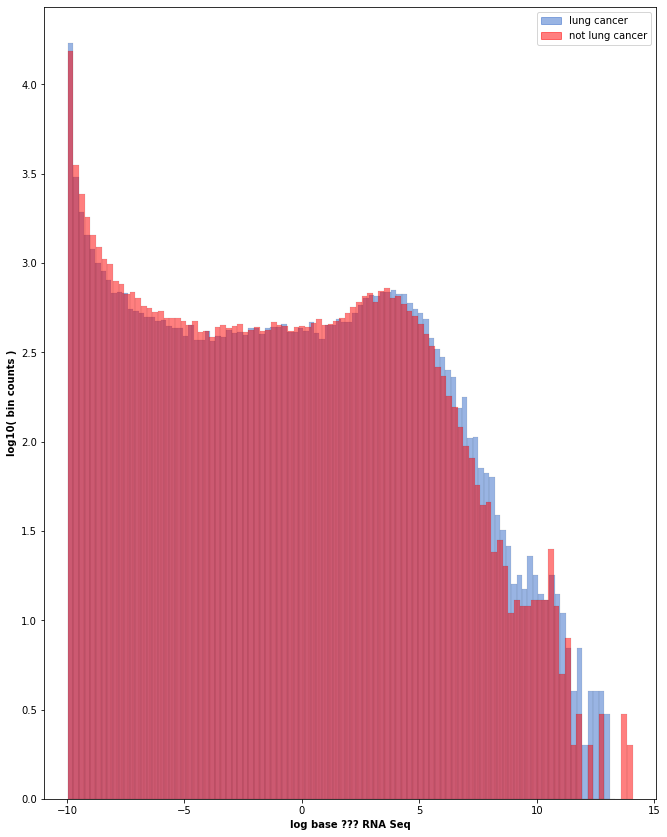

In [21]:
# FIXME: AEDWIP: ledge colors are easy to break, you need to know color and alpha

# standard paper size is 8.5 inches x 11 inches
pageWidthInInches  = 8.5
pageHeightInInches = 11  
fig = plt.figure( figsize=(pageWidthInInches, pageHeightInInches) )
panel = mu.createPanel(fig, pageWidthInInches, pageHeightInInches, 
                       leftRelativeSize=0, 
                       bottomRelativeSize=0)
numBins = 100
VollmerBlue = (53, 106, 201)
meanLungRNASeqNP = averageLungCancerRNASeq.to_numpy()
# meanLungRNASeqNPLog10 = np.log10(meanLungRNASeqNP)
lungCancerHist = muHistogram(panel, meanLungRNASeqNP, numBins, 
                             RGBTuple=VollmerBlue, alpha=0.5, semiLog=True,
                            label='lung cancer')

meanNotLungRNASeqNP = averageNotLungCancerRNASeq.to_numpy()
# meanNotLungRNASeqNPLog10 = np.log10(meanNotLungRNASeqNP)
notLungCancerHist = muHistogram(panel, meanNotLungRNASeqNP, numBins, 
                             RGBTuple=(255, 0, 0), alpha=0.5, semiLog=True,
                               label='not lung cancer')

xlimMin = np.min(meanNotLungRNASeqNP) - 1
xlimMax = np.max(meanNotLungRNASeqNP) + 1
print("xMin:{} xMax:{}".format(xlimMin, xlimMax))
panel.set_xlim(xlimMin,xlimMax)


ylimMin = np.min(notLungCancerHist.binCounts)# - 2
ylimMax = np.max(notLungCancerHist.binCounts) + 0.25 #+ 100
print("ylimMin:{} ylimMax:{}".format(ylimMin, ylimMax)) # max count base_10 15,304
panel.set_ylim(ylimMin, ylimMax)

panel.set_xlabel("log base ??? RNA Seq", fontsize=10, fontweight='bold')
panel.set_ylabel("log10( bin counts )", fontsize=10, fontweight='bold')

# TODO: AEDWIP move this into matplotlibUtilities.utilities
# https://stackoverflow.com/questions/43872450/matplotlib-histogram-with-multiple-legend-entries
handles = [ mplpatches.Rectangle((0,0),1,1,color=c, alpha=0.5) for c in [ (53/255, 106/255, 201/255), (255/255, 0, 0) ] ]
labels= ["lung cancer","not lung cancer"]
panel.legend(handles, labels)

In [ ]:
haldksls fskd xsllungDF.shape

In [ ]:
# standard paper size is 8.5 inches x 11 inches
pageWidthInInches  = 10
pageHeightInInches = 5  
fig = plt.figure( figsize=(pageWidthInInches, pageHeightInInches) )
panel = plt.gca()
meanRNASeqNP = averageLungCancerRNASeq.to_numpy()
panel.bar(meanRNASeqNP, 0.1, label='mean lung')



In [ ]:
df = pd.DataFrame({"A":[1, 2, 3, 4, 5], 
                   "B":[1, 2, 3, 4, 5],
                   }) 

rows = 0
cols = 1
df.mean(axis=cols) # no arg == axis = 0 3.0 = 15 / 3

In [ ]:
print(LungCancerRows.head())
print(type(LungCancerRows))
print()

print("~ is not in pandas")
print(~LungCancerRows.head())
